<a href="https://colab.research.google.com/github/Gabriel325896/Analisis-Numerico/blob/main/Capitulo_4_ejercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import cvxpy as cp
import sympy as sp
from sympy import Integral, Matrix, pprint, solve
import warnings
warnings.filterwarnings("ignore")
from scipy import optimize
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import cm

# Funciones de gradiente descendiente:

In [ ]:
def descent_grad_optim_step(x, f, grad, epsi, max_iter):  
  xs = np.zeros((1 + max_iter, len(x)))
  xs[0,:] = x
  for i in range(max_iter):
    g = grad(*x)
    def phi(s):
      params=x-s*g.T
      params=params[0,:]
      return f(*params)
    alpha = optimize.fminbound(phi, 0, 10)
    x = x - alpha * g.T
    x=x[0,:]
    xs[i+1,:] = x
    tol = np.linalg.norm(g)
    if tol < epsi:
     break
  return xs,i+1

In [ ]:
def descent_grad_fixed_step(x, grad, a, max_iter, epsi): 
  xs = np.zeros((1 + max_iter, len(x)))
  xs[0,:] = x
  for i in range(max_iter):
      g=grad(*x)
      x = x - a * g.T
      x=x[0,:]
      xs[i+1,:] = x
      tol = np.linalg.norm(grad(*x))
      if tol < epsi:
       break
  return xs,i+1

# Funciones de Gradiente y Hessiano:


In [ ]:
def gradient(f,*variables):
  n=len(variables)
  m=1
  grad=sp.zeros(n,m)
  i=0
  for var in variables:
    grad[i,0]=sp.diff(f,var)
    i+=1
  return grad

In [ ]:
def hessian(f,*variables):
  n=len(variables)
  m=n
  hess=sp.zeros(n,m)
  for i in range(0,n):
   for j in range(0,n):
  
    first_diff=sp.diff(f,variables[j])
    second_diff=sp.diff(first_diff,variables[i])
    hess[i,j]=second_diff  
  return hess

# Problema 1

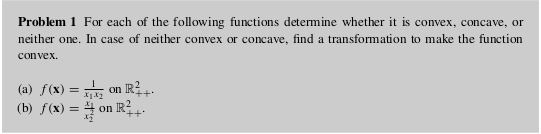

## (a)

In [ ]:
x1 = sp.Symbol('x1')
x2 = sp.Symbol('x2')
f = 1/(x1*x2) #funcion

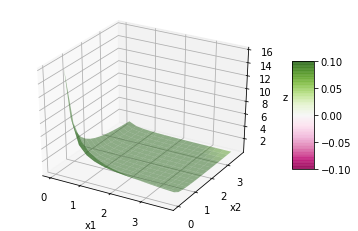

In [ ]:
# Graficar valor positivos:
xmax = 4
delta = 0.25
XX = np.arange(0, xmax, delta)
YY = np.arange(0, xmax, delta)
X, Y = np.meshgrid(XX, YY)

F = sp.lambdify([x1,x2],f)
Z = F(X,Y)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.PiYG, alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

Esta funcion es convexa.

## (b)

In [ ]:
x1 = sp.Symbol('x1')
x2 = sp.Symbol('x2')
f = x1/(x2**2) #funcion

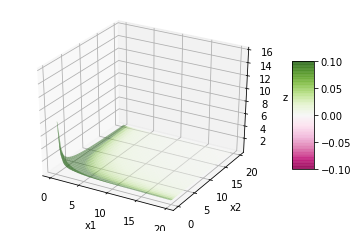

In [ ]:
#Gráficar valores positivos:
xmax = 20
delta = 0.25
XX = np.arange(0, xmax, delta)
YY = np.arange(0, xmax, delta)
X, Y = np.meshgrid(XX, YY)

F = sp.lambdify([x1,x2],f)
Z = F(X,Y)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.PiYG, alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

Esta funcion es convexa.

# Problema 2:

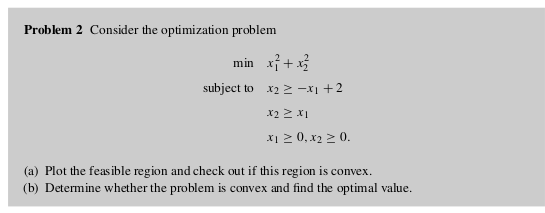

In [ ]:
x1 = sp.Symbol('x1')
x2 = sp.Symbol('x2')
f = x1**2+x2**2
subject1 = x1+x2-2  
subject2 = x2-x1   

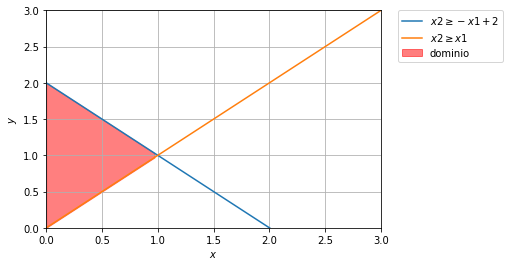

In [ ]:
# Gráfica de la región factible
x = np.linspace(0, 3, 100)
y1 = 2 - x
y2 = x
plt.plot(x, y1, label=r'$x2\geq -x1+2$')
plt.plot(x, y2, label=r'$x2\geq x1$')
plt.xlim((0, 3))
plt.ylim((0, 3))
plt.fill_between(x, y1, y2, where = (y1>y2), color='red', alpha=0.5,label='dominio')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid()

Observando la region factible se determina que esta es convexa.

In [ ]:
# Para determinar si el problema es o no convexo, vamos a calcular la matriz Hessiana de la función
hess = hessian(f,x1,x2)
hess_val = sp.lambdify([x1,x2],hess)
sp.init_printing()
print("La matriz Hessiana es:")
display(Matrix(hess))
print("")
print("Los valores propios de la matriz son: \n")
hess.eigenvals()

La matriz Hessiana es:


⎡2  0⎤
⎢    ⎥
⎣0  2⎦


Los valores propios de la matriz son: 



Como la matriz Hessiana y los valores propios son positivos, se confirma que la funcion es convexa.

In [ ]:
x1=cp.Variable(1)
x2=cp.Variable(1)
cost = x1**2 + x2**2
prob = cp.Problem(cp.Minimize(cost),
                  [x2>=-x1+2,
                  x2>=x1,
                  x2>=0,
                  x1>=0]
                  )
prob.solve()
print("El valor optimo es = {}".format(round(prob.value,1))) 
print('')
print("Solucion = ")
print(f"x1 = {x1.value} , x2 = {x2.value}")

El valor optimo es = 2.0

Solucion = 
x1 = [1.] , x2 = [1.]


# Problema 3

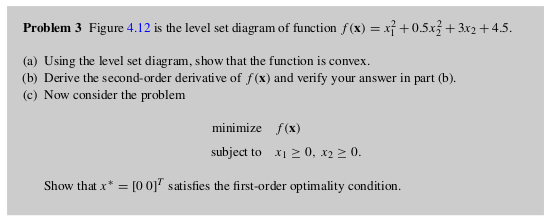

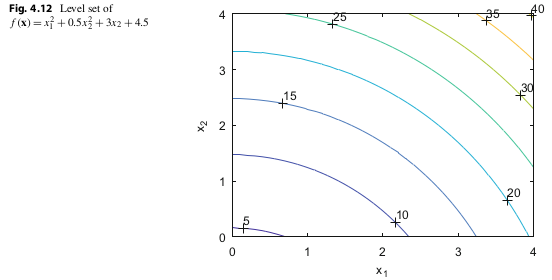

## (a)

Haciendo una inspeccion grafica del level set de la funcion se puede ver que si se traza cualquier segnamento unido por dos lineas los valores que tocan el segmento van a estar por debado de los putos usados para armarlo, por tanto la funcion es convexa.

## (b)

In [ ]:
# Para determinar si el problema es o no Convexo, se calcula la matriz Hessiana de la función
x1 = sp.Symbol('x1')
x2 = sp.Symbol('x2')
f = x1**2+0.5*x2**2+3*x2+4.5
hess = hessian(f,x1,x2)
hess_val = sp.lambdify([x1,x2],hess)

sp.init_printing()
print("La matriz Hessiana es:")
display(Matrix(hess))
print("\n")
print("Los valores propios de la matriz son: \n")
hess.eigenvals()


La matriz Hessiana es:


⎡2   0 ⎤
⎢      ⎥
⎣0  1.0⎦



Los valores propios de la matriz son: 



Se puede observar, que tanto la matriz hessiana como sus valores propios son positivos, por lo que podemos afirmar que la función en cuestión es Convexa.

## (c)

Al evaluar el punto dado en el gradiente se obtiene $[0 3]$ como resulado, haciendo

$$d^{T} \bigtriangledown  f(x^{*}) = 0 d_{1} + 3d_{2}$$ 

Por lo tanto, como 

# Problema 4

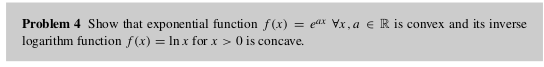

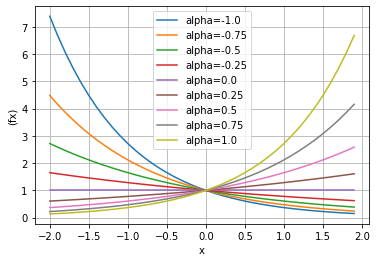

In [ ]:
# Graficar f(x) = e^ax
dalpha=0.25
alpha=np.arange(-1,1+dalpha,dalpha)
x=np.arange(-2,2,0.1)
for a in alpha:
  y=np.exp(x*a)
  plt.plot(x,y,label=f'alpha={a}')
  #print(y)
plt.xlabel('x')
plt.ylabel('(fx)')
plt.legend()
plt.grid()

De acuerdo con la anterior gráfica se puede deducir que $f(x)$ es Convexa para todos auquellos valores reales de $\alpha$.


$f(x) = ln(x)$

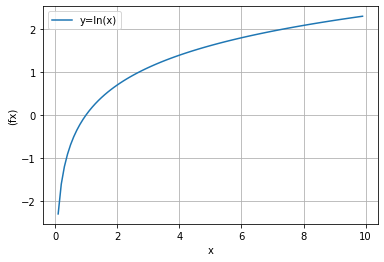

In [ ]:
# Graficar f(x) = lnx, x>0
x=np.arange(0.1,10,0.1)
y=np.log(x)
plt.plot(x,y,label=f'y=ln(x)')
plt.xlabel('x')
plt.ylabel('(fx)')
plt.legend()
plt.grid()
plt.show()

De acuerdo con la anterior gráfica se puede deducir que $f(x)$ es cóncava para $x > 0$.

# Problema 5

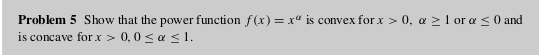

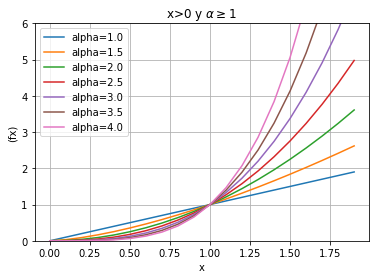

In [ ]:
dalpha=0.5
alpha=np.arange(1,4+dalpha,dalpha)
x=np.arange(0,2,0.1)
for a in alpha:
  y=x**a
  plt.plot(x,y,label=f'alpha={a}')
  #print(y)
plt.xlabel('x')
plt.ylabel('(fx)')
plt.legend()
plt.ylim(0,6)
plt.title(r'x>0 y $\alpha \geq$1 ')
plt.grid()

De acuerdo con la anterior gráfica se puede deducir que la función $f(x)$, con $x >0$ y $\alpha > 1$ es Convexa.